In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a4/7d/f1c30a92854540bf789e9cd5dde7ef49bbe63f855b85a2e6b3db8135c591/opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/39.5 MB 544.7 kB/s eta 0:01:13
   ---------------------------------------- 0.1/39.5 MB 901.1 kB/s eta 0:00:44
   ---------------------------------------- 0.3/39.5 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.3/39.5 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.4/39.5 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.5/39.5 MB 1.5 MB/s eta 0:00:27
    --------------------------------------- 0.6/39.5 MB 1.6 MB/s eta 0:00:25
    ---------------------

In [5]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

In [7]:
SIZE= 256
SEED_TRAINING=121
SEED_TESTING=197
SEED_VALIDATION=164
CHANNELS=3
n_classes=3
EPOCHS=20
BATCH_SIZE=16
input_shape=(SIZE, SIZE, CHANNELS)

In [8]:
train_datagen= ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip=True,
        fill_mode='nearest')

In [9]:
validation_datagen= ImageDataGenerator(rescale=1./255)
test_datagen= ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
        directory= r"C:\Users\ganesh mali\OneDrive\Desktop\COTB45\TechSaksham\archive (1)\Potato\Train",
        target_size= (255,256), # all images will be resized to 64*64
        batch_size= BATCH_SIZE,
        class_mode= 'categorical',
        color_mode="rgb")

Found 900 images belonging to 3 classes.


In [12]:
validation_generator= validation_datagen.flow_from_directory(
            directory= r"C:\Users\ganesh mali\OneDrive\Desktop\COTB45\TechSaksham\archive (1)\Potato\Valid",
            target_size= (256,256),
            batch_size= BATCH_SIZE,
            class_mode= 'categorical',
            color_mode="rgb")

Found 300 images belonging to 3 classes.


In [14]:
test_generator = test_datagen.flow_from_directory(
        directory=r"C:\Users\ganesh mali\OneDrive\Desktop\COTB45\TechSaksham\archive (1)\Potato\Test",
        target_size = (256, 256),
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode = "rgb"
)

Found 300 images belonging to 3 classes.


In [15]:
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
model=keras.models.Sequential([
        keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape = input_shape),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Dropout(0.5),
        keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(32, activation ='relu'),
        keras.layers.Dense(n_classes, activation='softmax')
    ])

C:\Users\ganesh mali\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 31, 31, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,667 (725.26 KB)

 Trainable params: 185,667 (725.26 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Epoch 1/20


C:\Users\ganesh mali\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.3344 - loss: 1.1152 - val_accuracy: 0.3403 - val_loss: 1.0953
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5625 - loss: 0.5416 - val_accuracy: 0.1667 - val_loss: 0.5517
Epoch 3/20


C:\Users\ganesh mali\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 842ms/step - accuracy: 0.4043 - loss: 1.0330 - val_accuracy: 0.6806 - val_loss: 0.7480
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6875 - loss: 0.2874 - val_accuracy: 0.9167 - val_loss: 0.3596
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 51s 870ms/step - accuracy: 0.7337 - loss: 0.5388 - val_accuracy: 0.8160 - val_loss: 0.4386
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8125 - loss: 0.3072 - val_accuracy: 0.6667 - val_loss: 0.2900
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 53s 871ms/step - accuracy: 0.8079 - loss: 0.4470 - val_accuracy: 0.8611 - val_loss: 0.3258
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0385 - val_accuracy: 0.8333 - val_loss: 0.1447
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 55s 915ms/step - accuracy: 0.8571 - loss: 0.3334 - val_accuracy: 0.8924 - val_loss: 0.3006
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8750 - loss: 0.1477 - val_accuracy: 0.7500 - val_los

In [20]:
score= model.evaluate(test_generator)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 470ms/step - accuracy: 0.9027 - loss: 0.2664
Test loss: 0.2628212571144104
Test accuracy: 0.9100000262260437


In [21]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss= history.history['val_loss']

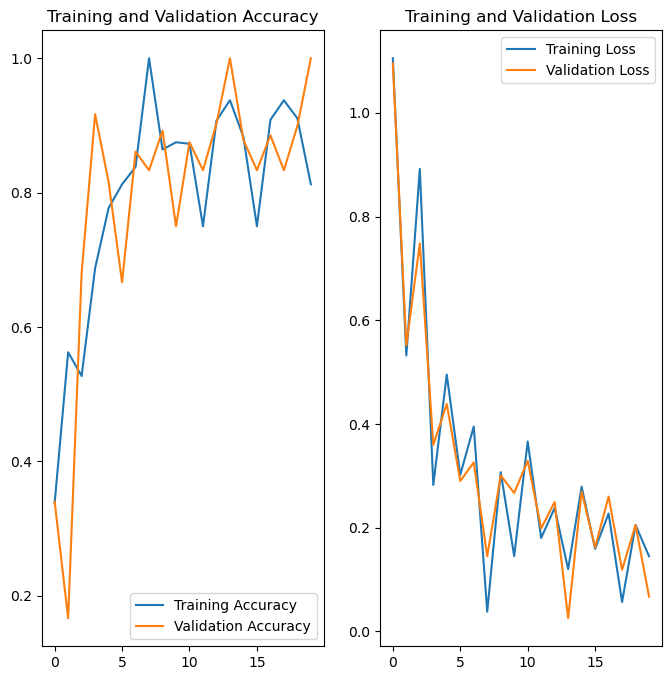

In [22]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [24]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model.save('final_model.h5')

In [27]:
def prediction(img):
    class_names = ['Early_blight', 'Healthy', 'Late_blight']

    my_image = image.load_img(img, SIZE)
    my_image = image.img_to_array(my_image)
    my_image = np.expand_dims(my_image, 0)

    out = np.round(model.predict(my_image)[0], 2)
    fig = plt.figure(figsize=(7, 4))
    plt.barh(class_names, out, color='lightgray',edgecolor='red', linewidth=1, height=0.5)

    for index, value in enumerate(out):
        plt.text(value/2 + 0.1, index, f"{100*value:.2f}%", fontweight='bold')

    plt.xticks([])
    plt.yticks([0, 1, 2], labels=class_names, fontweight='bold', fontsize=14)
    fig.savefig('pred_img.png', bbox_inches='tight')
    return plt.show()

In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np

def prediction(img):
    class_names = ['Early_blight', 'Healthy', 'Late_blight']
    
    # Define the target size explicitly (Example: 224x224 or any other expected size)
    target_size = (224, 224)  # Change this to the size expected by your model

    # Load the image with the correct target size
    my_image = image.load_img(img, target_size=target_size)

    # Convert to array and preprocess
    my_image = image.img_to_array(my_image)
    my_image = np.expand_dims(my_image, axis=0)  # Expand dimensions to match model input

    return my_image  # You might need further preprocessing (e.g., normalization)

# Test the function
img_path = r"C:\Users\ganesh mali\OneDrive\Desktop\COTB45\TechSaksham\archive (1)\Potato\Test\Potato___healthy\Potato_healthy-26-_0_4635.jpg"
processed_img = prediction(img_path)

In [31]:
img=r"C:\Users\ganesh mali\OneDrive\Desktop\COTB45\TechSaksham\archive (1)\Potato\Test\Potato___Late_blight\8829e413-5a7a-4680-b873-e71dfa9dbfe4___RS_LB 3974.JPG"
prediction(img)

array([[[[149., 128., 135.],
         [150., 129., 136.],
         [147., 126., 133.],
         ...,
         [161., 142., 148.],
         [161., 142., 148.],
         [161., 142., 148.]],

        [[150., 129., 136.],
         [151., 130., 137.],
         [148., 127., 134.],
         ...,
         [161., 142., 148.],
         [162., 143., 149.],
         [163., 144., 150.]],

        [[152., 131., 138.],
         [152., 131., 138.],
         [149., 128., 135.],
         ...,
         [161., 142., 148.],
         [163., 144., 150.],
         [164., 145., 151.]],

        ...,

        [[144., 125., 129.],
         [152., 133., 137.],
         [158., 139., 143.],
         ...,
         [157., 141., 144.],
         [163., 147., 150.],
         [161., 145., 148.]],

        [[154., 135., 139.],
         [160., 141., 145.],
         [162., 143., 147.],
         ...,
         [155., 139., 142.],
         [159., 143., 146.],
         [157., 141., 144.]],

        [[153., 134., 138.],
       

In [32]:
img=r"C:\Users\ganesh mali\OneDrive\Desktop\COTB45\TechSaksham\archive (1)\Potato\Test\Potato___Early_blight\7227b3db-c212-4370-8b42-443eea1577aa___RS_Early.B 7306.JPG"
prediction(img)

array([[[[175., 173., 187.],
         [177., 175., 189.],
         [177., 175., 189.],
         ...,
         [181., 178., 195.],
         [183., 180., 197.],
         [188., 185., 202.]],

        [[172., 170., 184.],
         [173., 171., 185.],
         [175., 173., 187.],
         ...,
         [185., 183., 197.],
         [186., 183., 200.],
         [190., 187., 204.]],

        [[169., 167., 181.],
         [170., 168., 182.],
         [171., 169., 183.],
         ...,
         [186., 184., 198.],
         [185., 183., 197.],
         [187., 184., 201.]],

        ...,

        [[137., 135., 148.],
         [139., 137., 150.],
         [132., 130., 143.],
         ...,
         [152., 149., 160.],
         [145., 142., 153.],
         [132., 129., 140.]],

        [[146., 144., 157.],
         [148., 146., 159.],
         [139., 137., 150.],
         ...,
         [157., 154., 165.],
         [150., 147., 158.],
         [134., 131., 142.]],

        [[152., 150., 163.],
       